--------------------------------------------------------------------------------------------------------------
# Área de Cadastro
--------------------------------------------------------------------------------------------------------------

In [2]:
import ipywidgets as widgets
from IPython.display import display, HTML
import oracledb
import pandas as pd
from tabulate import tabulate

# Widgets para cada campo da tabela
nm_usuario = widgets.Text(description='Nome Usuário:')
ds_email = widgets.Text(description='Email:')
ds_especialidade = widgets.Text(description='Especialidade:')
nr_nivel_experiencia = widgets.IntText(description='Nível Experiência:')
ds_localizacao = widgets.Text(description='Localização:')
dt_nascimento = widgets.DatePicker(description='Nascimento:')
ps_usuario = widgets.Textarea(description='Senha:')
tp_usuario = widgets.Dropdown(
    options=['Professor', 'Aluno'],
    description='Tipo Usuário:'
)
# Função para hashear a senha
def hash_password(password):
    import hashlib
    return hashlib.sha256(password.encode()).hexdigest()

# Função para inserir os dados no banco de dados e exibir a tabela
def inserir_dados(b):
    # Verificar se todos os campos estão preenchidos
    if not nm_usuario.value or not ds_email.value or not ds_especialidade.value or not nr_nivel_experiencia.value or not ds_localizacao.value or not dt_nascimento.value or not ps_usuario.value or not tp_usuario.value:
        print("Por favor, preencha todos os campos.")
        return
    
    with oracledb.connect(
        user='RM99667',
        password='260903',
        dsn='oracle.fiap.com.br:1521/ORCL',
        config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
    ) as connection:
        with connection.cursor() as cursor:
            # Garantir que a data esteja no formato correto
            data_nascimento = dt_nascimento.value.strftime('%Y-%m-%d')
            # Hashear a senha
            hashed_password = hash_password(ps_usuario.value)
            cursor.execute("""
                INSERT INTO RM99210.USUARIOS (
                    ID_USUARIO, NM_USUARIO, DS_EMAIL, DS_ESPECIALIDADE,
                    NR_NIVEL_EXPERIENCIA, DS_LOCALIZACAO,
                    DT_NASCIMENTO, PS_USUARIO, TP_USUARIO
                ) VALUES (
                    RM99210.SEQ_USUARIOS_ID.NEXTVAL, :1, :2, :3, :4, :5, TO_DATE(:6, 'YYYY-MM-DD'), :7, :8
                )
            """, (
                nm_usuario.value, ds_email.value, ds_especialidade.value,
                nr_nivel_experiencia.value, ds_localizacao.value,
                data_nascimento, hashed_password, tp_usuario.value
            ))
            connection.commit()
    print("Dados inseridos com sucesso!")
    exibir_tabela()

# Função para exibir a tabela
def exibir_tabela():
    sql_text = """
    SELECT * FROM RM99210.USUARIOS
    """
    with oracledb.connect(
        user='RM99667',
        password='260903',
        dsn='oracle.fiap.com.br:1521/ORCL',
        config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
    ) as connection:
        with connection.cursor() as cursor:
            # Fetch all rows from the executed query
            rows = cursor.execute(sql_text).fetchall()
            # Fetch column names
            column_names = [col[0] for col in cursor.description]
    # Convert the results to a DataFrame
    df = pd.DataFrame(rows, columns=column_names)
    # Display the DataFrame as an HTML table
    display(HTML(df.to_html(index=False, classes='table table-striped table-bordered')))

# Botão para acionar a inserção
botao_inserir = widgets.Button(description='Inserir Dados')
botao_inserir.on_click(inserir_dados)

# Exibir widgets
display(nm_usuario, ds_email, ds_especialidade, nr_nivel_experiencia, ds_localizacao, dt_nascimento, ps_usuario, tp_usuario, botao_inserir)

Text(value='', description='Nome Usuário:')

Text(value='', description='Email:')

Text(value='', description='Especialidade:')

IntText(value=0, description='Nível Experiência:')

Text(value='', description='Localização:')

DatePicker(value=None, description='Nascimento:', step=1)

Textarea(value='', description='Senha:')

Dropdown(description='Tipo Usuário:', options=('Professor', 'Aluno'), value='Professor')

Button(description='Inserir Dados', style=ButtonStyle())

Dados inseridos com sucesso!


ID_USUARIO,NM_USUARIO,DS_EMAIL,DS_ESPECIALIDADE,NR_NIVEL_EXPERIENCIA,NR_IDADE,DS_LOCALIZACAO,DT_NASCIMENTO,DT_CADASTRO,PS_USUARIO,TP_USUARIO
1,João Silva,joao.silva@example.com,Desenvolvedor,5,30,São Paulo,1993-05-15,2024-09-11 11:35:50,senhaSegura123,None
2,Maria Oliveira,maria.oliveira@example.com,Designer,3,28,Rio de Janeiro,1995-08-20,2024-09-11 11:35:50,senhaSegura456,None
3,Carlos Souza,carlos.souza@example.com,Analista,4,35,Belo Horizonte,1988-02-10,2024-09-11 11:35:50,senhaSegura789,None
4,Ana Lima,ana.lima@example.com,Gerente,6,40,Curitiba,1983-11-25,2024-09-11 11:35:50,senhaSegura012,None
5,Pedro Santos,pedro.santos@example.com,Tester,2,25,Porto Alegre,1998-07-30,2024-09-11 11:35:50,senhaSegura345,None
26,Luis,lbarre,hoiefugfhosdw,2,0,epijfg7fewohwr,2024-09-18,2024-09-19 19:40:26,e4d47db7213ef628b809c4b01ed5163b7f2e479059ca7a9c7d1b9ea1c4630331,Professor
23,Luis,Email,cardiaco,2,0,Piaui,2024-09-11,2024-09-18 16:46:58,94edf28c6d6da38fd35d7ad53e485307f89fbeaf120485c8d17a43f323deee71,None
12,Teste8,Teste8,Teste8,8,0,Teste8,2024-09-11,2024-09-11 19:14:30,Teste8,None
21,luis,luis@gmail.com,Analista,3,20,São Paulo,2003-12-11,2024-09-18 11:33:26,55a5e9e78207b4df8699d60886fa070079463547b095d1a05bc719bb4e6cd251,None
13,Teste9,Teste9,Teste9,9,0,Teste9,2024-09-02,2024-09-11 19:23:17,ad5ef9f34b1a1a3263a227fcaaab352702d912b002c0d9ad38c32f61dc03bb47,None


In [3]:
# LOGIN USUARIO

import ipywidgets as widgets
from IPython.display import display
import oracledb
import hashlib

# Function to hash the password
def hash_password(password):
    return hashlib.sha256(password.encode()).hexdigest()

# Function to log in the user
def login(username, password):
    hashed_password = hash_password(password)
    with oracledb.connect(
        user='RM99667',
        password='260903',
        dsn='oracle.fiap.com.br:1521/ORCL',
        config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
    ) as connection:
        with connection.cursor() as cursor:
            cursor.execute("""
                SELECT COUNT(*) FROM RM99210.USUARIOS
                WHERE NM_USUARIO = :1 AND PS_USUARIO = :2
            """, (username, hashed_password))
            result = cursor.fetchone()
            if result[0] > 0:
                print("Login successful!")
            else:
                print("Invalid username or password.")

# Widgets for username and password
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password:')
login_button = widgets.Button(description='Login')
error_label = widgets.Label(value='', layout=widgets.Layout(color='red'))

# Function to handle login button click
def on_login_button_clicked(b):
    username = username_widget.value.strip()
    password = password_widget.value.strip()
    
    # Verificar se todos os campos estão preenchidos
    if not username or not password:
        error_label.value = "Por favor, preencha todos os campos."
        return
    
    error_label.value = ''  # Clear any previous error message
    login(username, password)

# Attach the click event to the login button
login_button.on_click(on_login_button_clicked)

# Display the widgets
display(username_widget, password_widget, login_button, error_label)

Text(value='', description='Username:')

Password(description='Password:')

Button(description='Login', style=ButtonStyle())

Label(value='')

--------------------------------------------------------------------------------------------------------------
# Área do Professor e suas funcionalidades
--------------------------------------------------------------------------------------------------------------

In [4]:
import ipywidgets as widgets
from IPython.display import display
import oracledb

# Função para inserir dados na tabela Historico_Notas
def insert_historico_notas(data, nome_aluno, materia, periodo, medias_dos_alunos):
    try:
        # Conectar ao banco de dados Oracle
        with oracledb.connect(
            user='RM99667',
            password='260903',
            dsn='oracle.fiap.com.br:1521/ORCL',
            config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
        ) as connection:
            with connection.cursor() as cursor:
                # Executar a instrução SQL para inserir um novo registro
                cursor.execute("""
                    INSERT INTO RM99210.Historico_Notas (DATA, NOME_ALUNO, MATERIA, PERIODO, MEDIAS_DOS_ALUNOS)
                    VALUES (:1, :2, :3, :4, :5)
                """, (data, nome_aluno, materia, periodo, medias_dos_alunos))
                # Confirmar a transação
                connection.commit()
                print("Record inserted successfully!")
    except oracledb.DatabaseError as e:
        error, = e.args
        print(f"Database error: {error.message}")

# Widgets para inserir dados
data_widget = widgets.DatePicker(description='Data:')
nome_aluno_widget = widgets.Text(description='Nome Aluno:')
materia_widget = widgets.Text(description='Materia:')
periodo_widget = widgets.Dropdown(
    options=['Manhã', 'Noite'],
    description='Periodo:'
)
medias_dos_alunos_widget = widgets.FloatText(description='Media:', step=0.01)
insert_button = widgets.Button(description='Insert')
error_label = widgets.Label(value='', layout=widgets.Layout(color='red'))

# Função para lidar com o clique do botão de inserção
def on_insert_button_clicked(b):
    data = data_widget.value
    nome_aluno = nome_aluno_widget.value.strip()
    materia = materia_widget.value.strip()
    periodo = periodo_widget.value
    medias_dos_alunos = round(medias_dos_alunos_widget.value, 2)
    
    # Verificar se todos os campos estão preenchidos
    if not data or not nome_aluno or not materia or not periodo or medias_dos_alunos is None:
        error_label.value = "Por favor, preencha todos os campos."
        return
    
    error_label.value = ''  # Clear any previous error message
    insert_historico_notas(data, nome_aluno, materia, periodo, medias_dos_alunos)

# Anexar o evento de clique ao botão de inserção
insert_button.on_click(on_insert_button_clicked)

# Exibir os widgets
print("Insert Record:")
display(data_widget, nome_aluno_widget, materia_widget, periodo_widget, medias_dos_alunos_widget, insert_button, error_label)

Insert Record:


DatePicker(value=None, description='Data:', step=1)

Text(value='', description='Nome Aluno:')

Text(value='', description='Materia:')

Dropdown(description='Periodo:', options=('Manhã', 'Noite'), value='Manhã')

FloatText(value=0.0, description='Media:', step=0.01)

Button(description='Insert', style=ButtonStyle())

Label(value='')

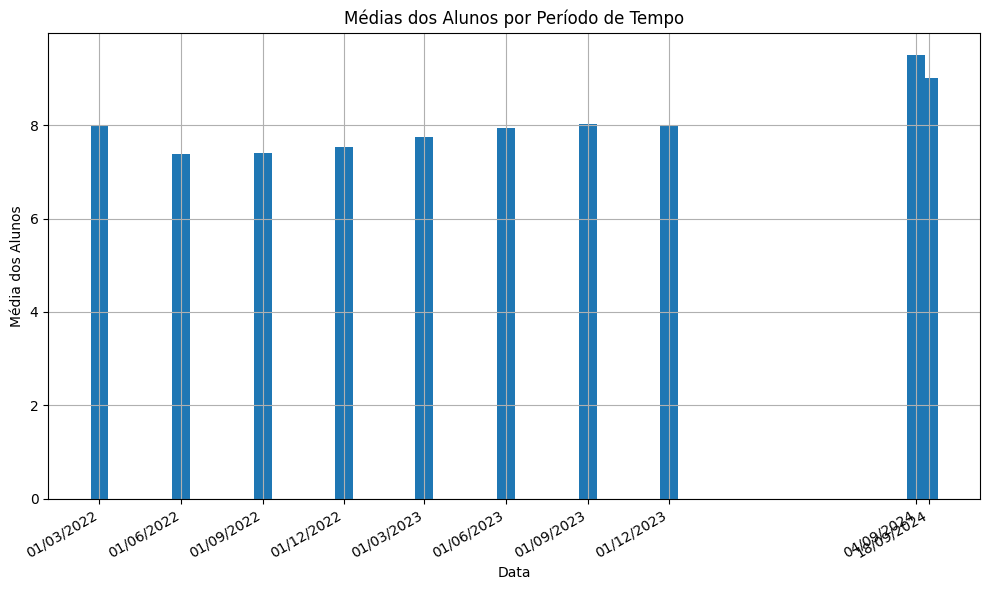

Done!!


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import oracledb

# Texto SQL que será executado
sql_text = """
SELECT DATA, MEDIAS_DOS_ALUNOS FROM RM99210.Historico_Notas
"""

# Aqui criamos uma conexão Python, objeto cursor e executamos a instrução usando Cursor.execute().
# Conexões e cursores devem ser liberados quando não são mais necessários.
# Eles são fechados automaticamente quando a variável que os referencia sai do escopo (e nenhuma outra referência é mantida).
# O bloco `with` é uma maneira conveniente de garantir isso.
with oracledb.connect(
  user='RM99667',
  password='260903',
  dsn='oracle.fiap.com.br:1521/ORCL',
  config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
) as connection:
    with connection.cursor() as cursor:
        # Buscar todas as linhas da consulta executada
        rows = cursor.execute(sql_text).fetchall()
        # Buscar nomes das colunas
        column_names = [col[0] for col in cursor.description]

# Converter os dados para um DataFrame
df = pd.DataFrame(rows, columns=column_names)

# Garantir que a coluna 'DATA' esteja no formato datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Agrupar por 'DATA' e calcular a média de 'MEDIAS_DOS_ALUNOS'
df_grouped = df.groupby('DATA').mean().reset_index()

# Plotar os dados como um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['DATA'], df_grouped['MEDIAS_DOS_ALUNOS'], width=20)  # Ajustar a largura para melhor espaçamento
plt.title('Médias dos Alunos por Período de Tempo')
plt.xlabel('Data')
plt.ylabel('Média dos Alunos')
plt.grid(True)
plt.xticks(df_grouped['DATA'], df_grouped['DATA'].dt.strftime('%d/%m/%Y'), rotation=45, ha='right', fontsize=10)  # Formatar datas e ajustar o tamanho da fonte
plt.gcf().autofmt_xdate()  # Auto formatar rótulos de data
plt.tight_layout()
plt.show()

print("Done!!")

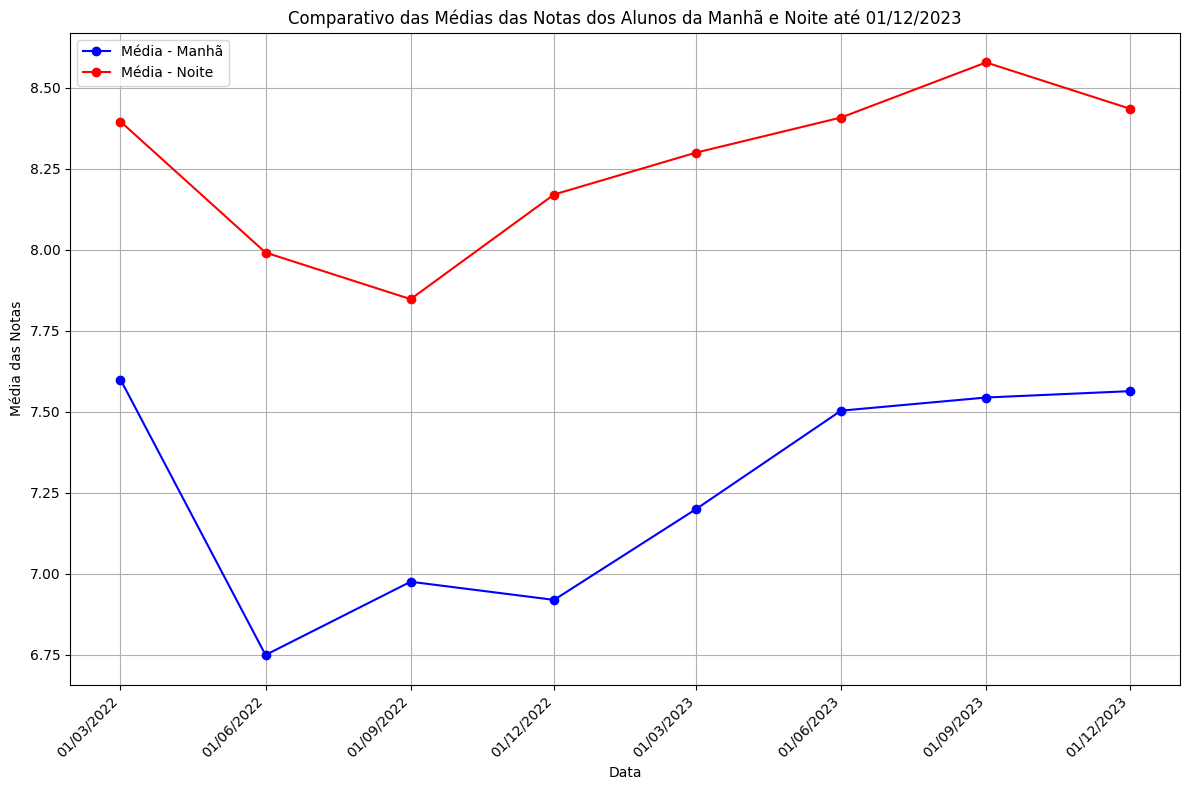

Done!!


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import oracledb

# Texto SQL que será executado
sql_text = """
SELECT DATA, MEDIAS_DOS_ALUNOS, PERIODO FROM RM99210.Historico_Notas
WHERE DATA <= TO_DATE('01-12-2023', 'DD-MM-YYYY')
"""

# Aqui criamos uma conexão Python, objeto cursor e executamos a instrução usando Cursor.execute().
# Conexões e cursores devem ser liberados quando não são mais necessários.
# Eles são fechados automaticamente quando a variável que os referencia sai do escopo (e nenhuma outra referência é mantida).
# O bloco `with` é uma maneira conveniente de garantir isso.
with oracledb.connect(
  user='RM99667',
  password='260903',
  dsn='oracle.fiap.com.br:1521/ORCL',
  config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
) as connection:
    with connection.cursor() as cursor:
        # Buscar todas as linhas da consulta executada
        rows = cursor.execute(sql_text).fetchall()
        # Buscar nomes das colunas
        column_names = [col[0] for col in cursor.description]

# Converter os dados para um DataFrame
df = pd.DataFrame(rows, columns=column_names)

# Garantir que a coluna 'DATA' esteja no formato datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Garantir que a coluna 'MEDIAS_DOS_ALUNOS' seja numérica
df['MEDIAS_DOS_ALUNOS'] = pd.to_numeric(df['MEDIAS_DOS_ALUNOS'], errors='coerce')

# Remover linhas com valores NaN em 'MEDIAS_DOS_ALUNOS'
df = df.dropna(subset=['MEDIAS_DOS_ALUNOS'])

# Separar dados para os períodos da manhã e da noite
df_morning = df[df['PERIODO'] == 'Manhã']
df_night = df[df['PERIODO'] == 'Noite']

# Agrupar por 'DATA' e calcular a média de 'MEDIAS_DOS_ALUNOS' para cada período
df_morning_grouped = df_morning.groupby('DATA')['MEDIAS_DOS_ALUNOS'].mean().reset_index()
df_night_grouped = df_night.groupby('DATA')['MEDIAS_DOS_ALUNOS'].mean().reset_index()

# Plotar os resultados para ambos os períodos em um gráfico
plt.figure(figsize=(12, 8))
plt.plot(df_morning_grouped['DATA'], df_morning_grouped['MEDIAS_DOS_ALUNOS'], marker='o', linestyle='-', color='b', label='Média - Manhã')
plt.plot(df_night_grouped['DATA'], df_night_grouped['MEDIAS_DOS_ALUNOS'], marker='o', linestyle='-', color='r', label='Média - Noite')
plt.title('Comparativo das Médias das Notas dos Alunos da Manhã e Noite até 01/12/2023')
plt.xlabel('Data')
plt.ylabel('Média das Notas')
plt.grid(True)
plt.xticks(df_morning_grouped['DATA'], df_morning_grouped['DATA'].dt.strftime('%d/%m/%Y'), rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

print("Done!!")

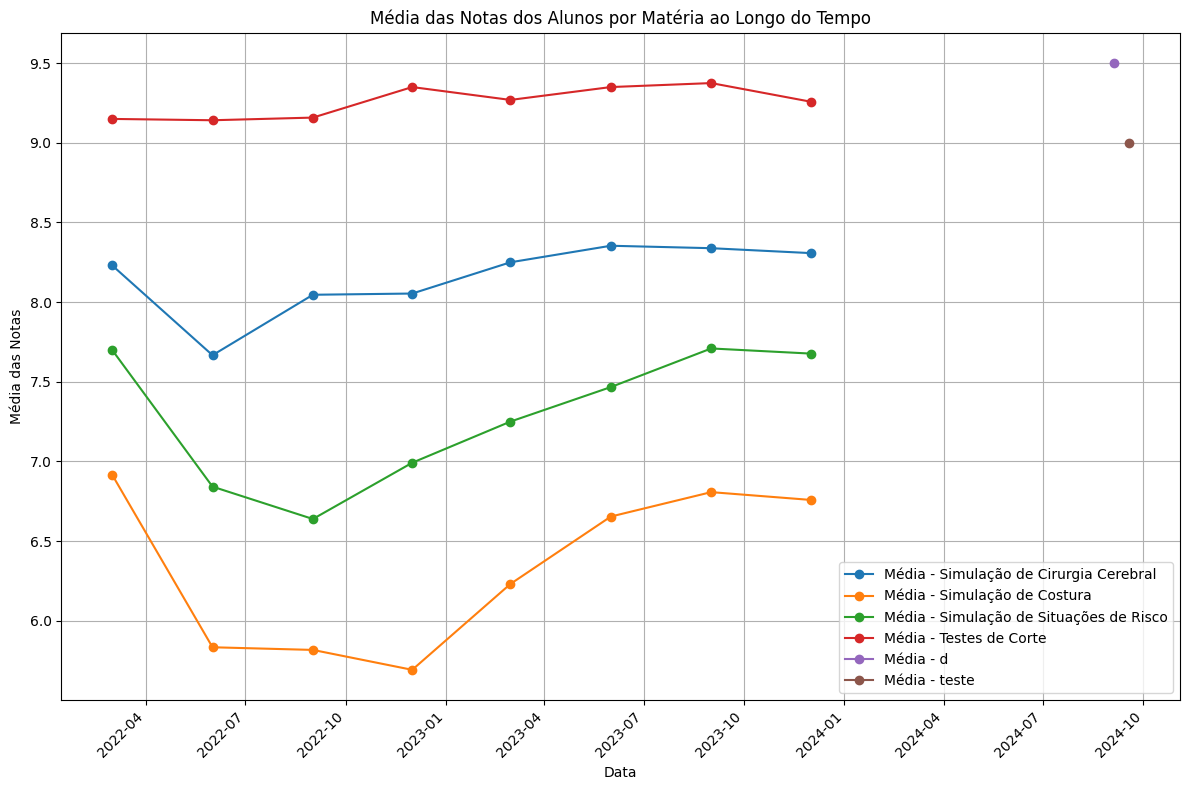

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import oracledb

# this is the SQL text that will be executed
sql_text = """
SELECT DATA, MEDIAS_DOS_ALUNOS, MATERIA FROM RM99210.Historico_Notas
"""

# here we create a python connection,cursor object and execute the statement using  Cursor.execute().
# connections and cursors should be released when they are no longer needed.
# closed automatically when the variable referencing it goes out of scope (and no further references are retained).
# `with` block is a convenient way to ensure this
with oracledb.connect(
  user='RM99667',
  password='260903',
  dsn='oracle.fiap.com.br:1521/ORCL',
  config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
) as connection:
    with connection.cursor() as cursor:
        # Fetch all rows from the executed query
        rows = cursor.execute(sql_text).fetchall()
        # Fetch column names
        column_names = [col[0] for col in cursor.description]

# Convert the data to a DataFrame
df = pd.DataFrame(rows, columns=column_names)

# Ensure the 'DATA' column is in datetime format
df['DATA'] = pd.to_datetime(df['DATA'])

# Ensure the 'MEDIAS_DOS_ALUNOS' column is numeric
df['MEDIAS_DOS_ALUNOS'] = pd.to_numeric(df['MEDIAS_DOS_ALUNOS'], errors='coerce')

# Drop rows with NaN values in 'MEDIAS_DOS_ALUNOS'
df = df.dropna(subset=['MEDIAS_DOS_ALUNOS'])

# Group by 'DATA' and 'MATERIA' and calculate the mean of 'MEDIAS_DOS_ALUNOS'
df_grouped = df.groupby(['DATA', 'MATERIA'])['MEDIAS_DOS_ALUNOS'].mean().reset_index()

# Plotting the results for each subject
plt.figure(figsize=(12, 8))
for materia in df_grouped['MATERIA'].unique():
    df_materia = df_grouped[df_grouped['MATERIA'] == materia]
    plt.plot(df_materia['DATA'], df_materia['MEDIAS_DOS_ALUNOS'], marker='o', linestyle='-', label=f'Média - {materia}')

plt.title('Média das Notas dos Alunos por Matéria ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Média das Notas')
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\luisg\AppData\Local\Temp\ipykernel_27900\3099210818.py:88: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2023-03-01', periods=num_periods, freq='3M')


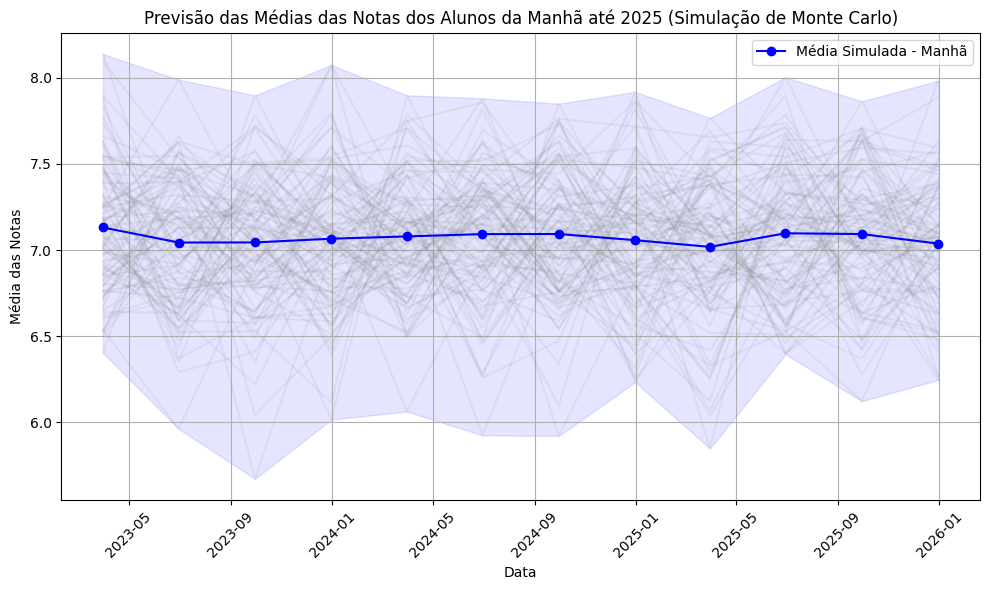

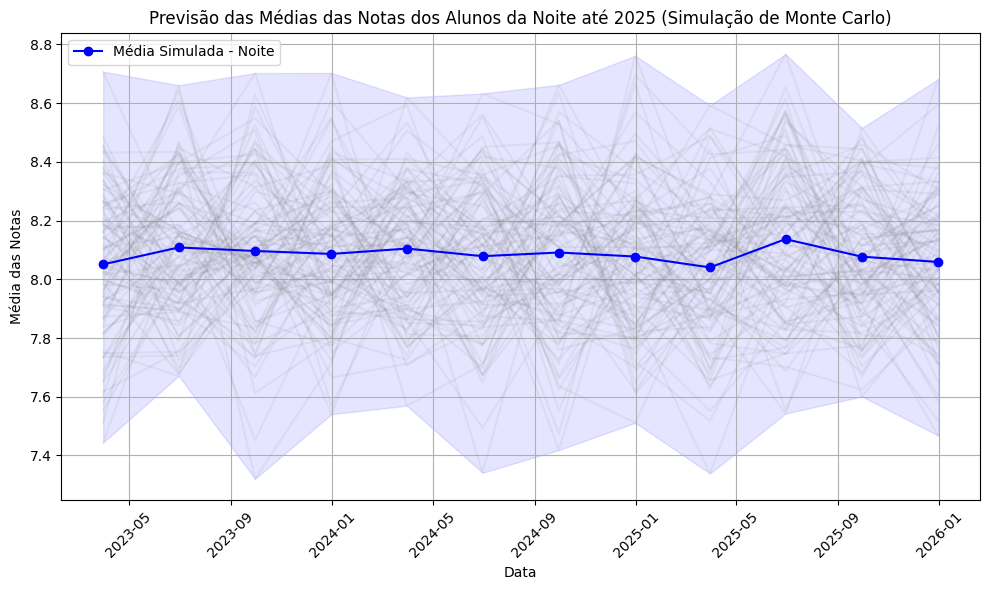

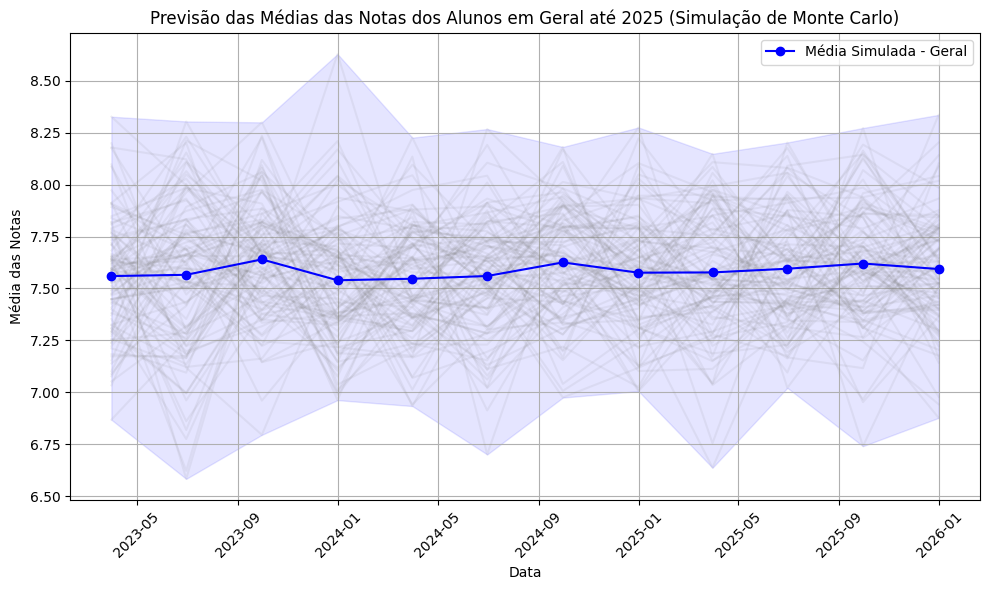

Done!!


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import oracledb

# this is the SQL text that will be executed
sql_text = """
SELECT DATA, MEDIAS_DOS_ALUNOS, PERIODO FROM RM99210.Historico_Notas
WHERE EXTRACT(YEAR FROM DATA) = 2022
"""

# here we create a python connection,cursor object and execute the statement using  Cursor.execute().
# connections and cursors should be released when they are no longer needed.
# closed automatically when the variable referencing it goes out of scope (and no further references are retained).
# `with` block is a convenient way to ensure this
with oracledb.connect(
  user='RM99667',
  password='260903',
  dsn='oracle.fiap.com.br:1521/ORCL',
  config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
) as connection:
    with connection.cursor() as cursor:
        # Fetch all rows from the executed query
        rows = cursor.execute(sql_text).fetchall()
        # Fetch column names
        column_names = [col[0] for col in cursor.description]

# Convert the data to a DataFrame
df = pd.DataFrame(rows, columns=column_names)

# Ensure the 'DATA' column is in datetime format
df['DATA'] = pd.to_datetime(df['DATA'])

# Ensure the 'MEDIAS_DOS_ALUNOS' column is numeric
df['MEDIAS_DOS_ALUNOS'] = pd.to_numeric(df['MEDIAS_DOS_ALUNOS'], errors='coerce')

# Drop rows with NaN values in 'MEDIAS_DOS_ALUNOS'
df = df.dropna(subset=['MEDIAS_DOS_ALUNOS'])

# Separate data for morning, night, and general periods
df_morning = df[df['PERIODO'] == 'Manhã']
df_night = df[df['PERIODO'] == 'Noite']
df_general = df  # All data

# Group by 'DATA' and calculate the mean of 'MEDIAS_DOS_ALUNOS' for each period
df_morning_grouped = df_morning.groupby('DATA')['MEDIAS_DOS_ALUNOS'].mean().reset_index()
df_night_grouped = df_night.groupby('DATA')['MEDIAS_DOS_ALUNOS'].mean().reset_index()
df_general_grouped = df_general.groupby('DATA')['MEDIAS_DOS_ALUNOS'].mean().reset_index()

# Extract the mean and standard deviation of the 2022 data for each period
mean_morning_2022 = df_morning_grouped['MEDIAS_DOS_ALUNOS'].mean()
std_morning_2022 = df_morning_grouped['MEDIAS_DOS_ALUNOS'].std()

mean_night_2022 = df_night_grouped['MEDIAS_DOS_ALUNOS'].mean()
std_night_2022 = df_night_grouped['MEDIAS_DOS_ALUNOS'].std()

mean_general_2022 = df_general_grouped['MEDIAS_DOS_ALUNOS'].mean()
std_general_2022 = df_general_grouped['MEDIAS_DOS_ALUNOS'].std()

# Define the number of simulations and the number of periods (quarters) until 2025
num_simulations = 100
num_periods = (2025 - 2022) * 4  # 4 quarters per year

# Perform Monte Carlo simulation for morning period
simulations_morning = np.zeros((num_simulations, num_periods))
for i in range(num_simulations):
    simulated_values = np.random.normal(mean_morning_2022, std_morning_2022, num_periods)
    simulations_morning[i, :] = simulated_values

# Perform Monte Carlo simulation for night period
simulations_night = np.zeros((num_simulations, num_periods))
for i in range(num_simulations):
    simulated_values = np.random.normal(mean_night_2022, std_night_2022, num_periods)
    simulations_night[i, :] = simulated_values

# Perform Monte Carlo simulation for general period
simulations_general = np.zeros((num_simulations, num_periods))
for i in range(num_simulations):
    simulated_values = np.random.normal(mean_general_2022, std_general_2022, num_periods)
    simulations_general[i, :] = simulated_values

# Calculate the mean of the simulations for each period
mean_simulations_morning = simulations_morning.mean(axis=0)
mean_simulations_night = simulations_night.mean(axis=0)
mean_simulations_general = simulations_general.mean(axis=0)

# Create a date range for the periods
date_range = pd.date_range(start='2023-03-01', periods=num_periods, freq='3M')

# Plotting the results for morning period
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(date_range, simulations_morning[i, :], color='gray', alpha=0.1)
plt.plot(date_range, mean_simulations_morning, marker='o', linestyle='-', color='b', label='Média Simulada - Manhã')
plt.fill_between(date_range, simulations_morning.min(axis=0), simulations_morning.max(axis=0), color='blue', alpha=0.1)
plt.title('Previsão das Médias das Notas dos Alunos da Manhã até 2025 (Simulação de Monte Carlo)')
plt.xlabel('Data')
plt.ylabel('Média das Notas')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the results for night period
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(date_range, simulations_night[i, :], color='gray', alpha=0.1)
plt.plot(date_range, mean_simulations_night, marker='o', linestyle='-', color='b', label='Média Simulada - Noite')
plt.fill_between(date_range, simulations_night.min(axis=0), simulations_night.max(axis=0), color='blue', alpha=0.1)
plt.title('Previsão das Médias das Notas dos Alunos da Noite até 2025 (Simulação de Monte Carlo)')
plt.xlabel('Data')
plt.ylabel('Média das Notas')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting the results for general period
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(date_range, simulations_general[i, :], color='gray', alpha=0.1)
plt.plot(date_range, mean_simulations_general, marker='o', linestyle='-', color='b', label='Média Simulada - Geral')
plt.fill_between(date_range, simulations_general.min(axis=0), simulations_general.max(axis=0), color='blue', alpha=0.1)
plt.title('Previsão das Médias das Notas dos Alunos em Geral até 2025 (Simulação de Monte Carlo)')
plt.xlabel('Data')
plt.ylabel('Média das Notas')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Done!!")

--------------------------------------------------------------------------------------------------------------
# Área do Aluno e suas funcionalidades
--------------------------------------------------------------------------------------------------------------

In [9]:
import ipywidgets as widgets
from IPython.display import display
import oracledb

# Função para exibir a nota do aluno e a data
def display_grade(nome_aluno):
    try:
        # Conectar ao banco de dados Oracle
        with oracledb.connect(
            user='RM99667',
            password='260903',
            dsn='oracle.fiap.com.br:1521/ORCL',
            config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
        ) as connection:
            # Criar um cursor para executar a consulta SQL
            with connection.cursor() as cursor:
                # Executar a consulta SQL para obter a nota do aluno e a data
                cursor.execute("""
                    SELECT DATA, MEDIAS_DOS_ALUNOS FROM RM99210.Historico_Notas
                    WHERE NOME_ALUNO = :1
                """, (nome_aluno,))
                # Obter o resultado da consulta
                result = cursor.fetchone()
                # Verificar se a nota foi encontrada
                if result:
                    data, media = result
                    print(f"Date: {data}, Your grade is: {media}")
                else:
                    print("No grade found for this student name.")
    except oracledb.DatabaseError as e:
        # Capturar e exibir erros de banco de dados
        error, = e.args
        print(f"Database error: {error.message}")

# Widgets para o nome do aluno
nome_aluno_widget = widgets.Text(description='Student Name:')
check_grade_button = widgets.Button(description='Check Grade')
error_label = widgets.Label(value='', layout=widgets.Layout(color='red'))

# Função para lidar com o clique do botão de verificar nota
def on_check_grade_button_clicked(b):
    nome_aluno = nome_aluno_widget.value.strip()
    
    # Verificar se o campo de nome do aluno está preenchido
    if not nome_aluno:
        error_label.value = "Por favor, preencha o campo de nome do aluno."
        return
    
    error_label.value = ''  # Clear any previous error message
    display_grade(nome_aluno)

# Anexar o evento de clique ao botão de verificar nota
check_grade_button.on_click(on_check_grade_button_clicked)

# Exibir os widgets
display(nome_aluno_widget, check_grade_button, error_label)

Text(value='', description='Student Name:')

Button(description='Check Grade', style=ButtonStyle())

Label(value='')

In [10]:
import ipywidgets as widgets
from IPython.display import display, HTML
import oracledb
from tabulate import tabulate

# Função para exibir as descrições do jogo
def display_game_descriptions(nome_jogo):
    try:
        # Conectar ao banco de dados Oracle
        with oracledb.connect(
            user='RM99667',
            password='260903',
            dsn='oracle.fiap.com.br:1521/ORCL',
            config_dir='C:\\Users\\victo\\Oracle\\network\\admin',
        ) as connection:
            # Criar um cursor para executar a consulta SQL
            with connection.cursor() as cursor:
                # Executar a consulta SQL para obter as descrições do jogo
                cursor.execute("""
                    SELECT ID_JOGO, TP_JOGO, NR_DIFICULDADE, DT_LANCAMENTO, DS_JOGO, NOME
                    FROM RM99210.JOGO
                    WHERE TRIM(UPPER(NOME)) = TRIM(UPPER(:1))
                """, (nome_jogo,))
                # Obter todos os resultados da consulta
                results = cursor.fetchall()
                # Verificar se algum resultado foi encontrado
                if results:
                    # Exibir os resultados em formato de tabela
                    display(HTML(tabulate(results, headers=['ID_JOGO', 'TP_JOGO', 'NR_DIFICULDADE', 'DT_LANCAMENTO', 'DS_JOGO', 'NOME'], tablefmt='html')))
                else:
                    print("No game found with this name.")
    except oracledb.DatabaseError as e:
        # Capturar e exibir erros de banco de dados
        error, = e.args
        print(f"Database error: {error.message}")

# Widgets para o nome do jogo
nome_jogo_widget = widgets.Text(description='Game Name:')
check_game_button = widgets.Button(description='Check Game')
error_label = widgets.Label(value='', layout=widgets.Layout(color='red'))

# Função para lidar com o clique do botão de verificar jogo
def on_check_game_button_clicked(b):
    nome_jogo = nome_jogo_widget.value.strip()
    
    # Verificar se o campo de nome do jogo está preenchido
    if not nome_jogo:
        error_label.value = "Por favor, preencha o campo de nome do jogo."
        return
    
    error_label.value = ''  # Clear any previous error message
    display_game_descriptions(nome_jogo)

# Anexar o evento de clique ao botão de verificar jogo
check_game_button.on_click(on_check_game_button_clicked)

# Exibir os widgets
display(nome_jogo_widget, check_game_button, error_label)

Text(value='', description='Game Name:')

Button(description='Check Game', style=ButtonStyle())

Label(value='')